# UE22CS342AA2: Data Analytics - Worksheet 3a
# Time Series Analysis and Forecasting Techniques

Designed by Anshul Ranjan, Dept.of CSE - itsanshulranjan@gmail.com

## Student Details

• Name: ABUTHWAHIR H M 

• SRN: PES1UG22CS022

• Section: A 

## Air Passengers Analysis
Imagine you're optimizing airline services. \
You've been given a dataset, your task is to analyze monthly trends in air passenger numbers to inform decisions such as route planning, pricing strategies, and enhancing the overall travel experience.

### Contents of the worksheet

It is suggested to have a grip on the theoretical concepts of:

* Components of time series data 
* Decomposition of time series data
* Exponential Smoothing techniques
* Stationary Signals, Dickey-fuller test and Differencing
* Forecasting with AR, MA, ARMA
* Autocorrelation (ACF, PACF) and ARIMA
* Seasonality in Time Series and SARIMA

### Dataset

The data is provided in the AirPassengers.csv file. The data dictionary is as follows:

* Month: The month of the year (formatted as 'YYYY-MM') during which passenger data was collected.
* Passengers: The number of air passengers recorded during that month.

The target variable is **Passengers**, which we shall analyze and forecast in this worksheet. Understanding the trends and patterns in air passenger data is crucial for airline route planning, pricing strategies, capacity management, and enhancing the overall travel experience. Accurately predicting passenger volumes aids in optimizing resources, scheduling, and making informed decisions to meet market demands and improve service quality.

In [3]:
# Load necessary libraries
library(dplyr) 
library(tidyr)  
library(ggplot2) 

options(warn=-1)

### Data Ingestion and Preprocessing
• Reading this file into a data.frame object

In [4]:
# Read the CSV file
df <- read.csv('/kaggle/input/flight-attendees/AirPassengers.csv')

# Display information about the data frame
str(df)

'data.frame':	144 obs. of  2 variables:
 $ Month       : chr  "1949-01" "1949-02" "1949-03" "1949-04" ...
 $ X.Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


In [5]:
head(df)

,Month,X.Passengers
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


The class (data type) of each column in the data frame

In [6]:
sapply(df, class)

Month X.Passengers 
 "character"    "integer"

In [7]:
# Convert 'Month' to Date type
df$Month <- as.Date(paste0(df$Month, "-01"), format="%Y-%m-%d")

# Check the data types of the columns
sapply(df, class)

Month X.Passengers 
      "Date"    "integer"

In [8]:
length(unique(df$Month))

[1] 144

In [9]:
# Rename columns
df <- df %>% rename(value = X.Passengers, month = Month)
head(df)

,month,value
,<date>,<int>
1,1949-01-01,112
2,1949-02-01,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-05-01,121
6,1949-06-01,135


Setting the 'Month' column as the index of the DataFrame to organize the data by time, then plotting the data to visualize the trend in passenger numbers over the given months.

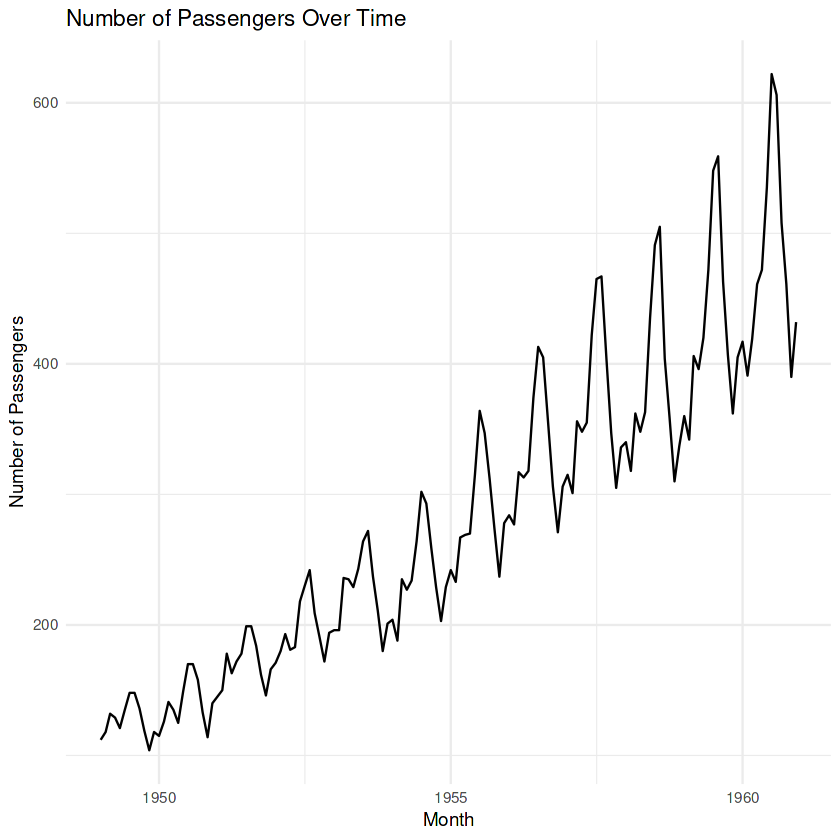

In [10]:
# Set 'month' as the index (not strictly necessary in R but useful for plotting)
df <- df %>% arrange(month)

# Plot the data
ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Number of Passengers Over Time", x = "Month", y = "Number of Passengers") +
  theme_minimal()

Applying a 12-month rolling average to the 'value' column to smooth out short-term fluctuations and highlight longer-term trends, then plotting this smoothed data with 'Date' as the x-axis label for better visualization.

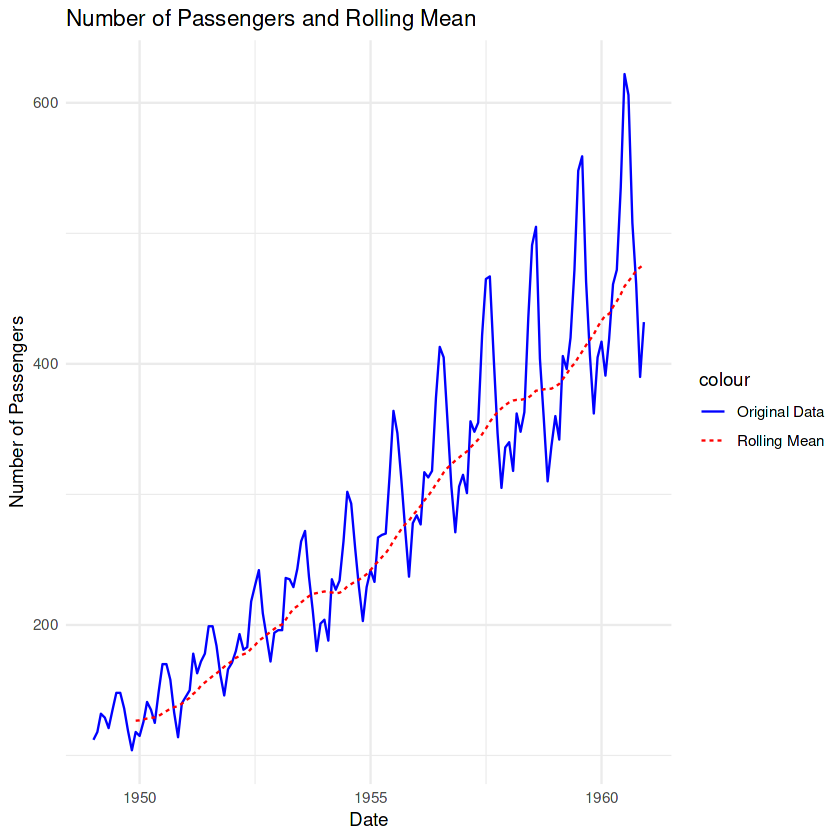

In [12]:
library(zoo)

# Calculate the rolling mean
df$rolling_mean <- rollmean(df$value, k = 12, fill = NA, align = "right")

# Plot the rolling mean
ggplot(df, aes(x = month)) +
  geom_line(aes(y = value, color = "Original Data")) +
  geom_line(aes(y = rolling_mean, color = "Rolling Mean"), linetype = "dashed") +
  labs(title = "Number of Passengers and Rolling Mean",
       x = "Date",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Original Data" = "blue", "Rolling Mean" = "red"))


## Stationarity
• Testing for stationarity \
– We can use the Augmented Dickey-Fuller test (ADF) to test the time series for stationarity

Question 3.1: What are the null hypothesis and alternate hypothesis in this case?

In [ ]:
# Your answer here
Null hypothesis for Dickey fuller test is  time series data to be stationary.
Alternative hypothesis: The time series is stationary.


Question 3.2: What are you doing by performing the Augmented Dickey-Fuller (ADF) test on the 'value' column, and how do you interpret the ADF statistic and p-value to determine if the data is stationary?

In [ ]:
# Your answer here 
Purpose: The ADF test tests for the existence of a unit root in the 'value' column of a data set to determine if the series is stationary or not.
    
ADF Statistic: The farther from zero the negative value, the stronger the evidence against the null hypothesis of nonstationarity.
p-value: If the p-value is less than 0.05, the series is stationary.
otherwise, if greater than or equal to 0.05, then the series is not stationary.
p-value < 0.05: Reject the null hypothesis; the series is stationary.
p-value ≥ 0.05: Failed to reject the null hypothesis; the series is most likely non-stationary and may require transformation

Conclusion: The ADF test is useful for knowing which modeling approach should be appropriate for time series data; greater negative ADF statistics only strengthen the conclusion that stationarity holds.


Question 3.3: Write the code to perform the Augmented Dickey-Fuller (ADF) test on the 'value' column of the DataFrame df to check for stationarity. After running the code, determine whether the data is stationary based on the p-value.

In [ ]:
#Your answer here 


 > Hint : Check the tseries library to perform the test (adf function)
 > * Don't Forget to perform this y <- diffinv(x) before the adf test check the docs here - https://cran.r-project.org/web/packages/tseries/tseries.pdf
 > * https://uribo.github.io/rpkg_showcase/date_and_time/tseries.html
 > * https://rdrr.io/cran/tseries/

In [21]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
x <- df$value
y <- diffinv(x)

adf_test <- adf.test(y)

print(adf_test)

# Answer in the markdown below


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = 2.6449, Lag order = 5, p-value = 0.99
alternative hypothesis: stationary



In [ ]:
#Meaninng
We find that p value is 0.99, which is greater than the alpha value of 0.05. Therefore we could not reject the null hypothesis that the data is not stationary.
Dickey-Fuller value: 2.6449 This is a positive value 
It only means that the series is not stationary.

• If the data is not stationary, and if we intend to use a model like ARIMA, the data has to
be transformed. \
• Two most common methods to transform series to stationary are:

* Transformations: eg. log or square root or combinations of these transformations to
stabilize non-constant variance.
* Differencing: subtract current value from previous (with a certain degree)

Check this out for more information, and an implementation in Python!: \
https://www.kaggle.com/code/rdizzl3/time-series-transformations

Question 3.4: Create a new dataframe using suitable differencing order, to convert the data
to stationary time series. 
 > Hint: You can use the same function to confirm the time series is stationary after transformation.

Try to perform first order differencing and observe how the values changes (ADF statistic and p-value), also observe the change in ACF and PACF plots \
Always try to plot the graphs before making the final decision

In [18]:
x <- df$value

# Apply first differencing
diff_x <- diff(x)

# Perform the ADF test again on the differenced series
adf_test_diff <- adf.test(diff_x)

print(adf_test_diff)


	Augmented Dickey-Fuller Test

data:  diff_x
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



In [ ]:
#Meaninng
We find that p value is 0.01 , which is lesser than the alpha value of 0.05. Therefore we could reject the null hypothesis that the data is not stationary.
Dickey-Fuller value: -7.0177 This is a positive value 
It only means that the series is stationary.

## Autocorrelation Analysis
• We will experiment and plot two functions: 
* **ACF (Autocorrelation function)**: The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number
of periods or units.
* **PACF (Partial Autocorrelation function)**: Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables.

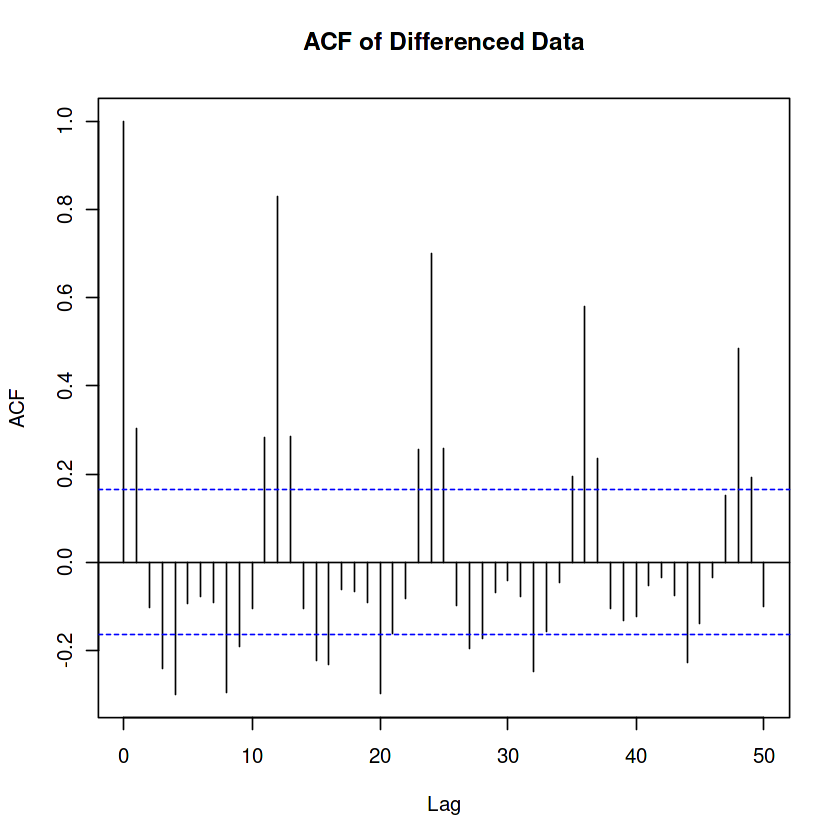

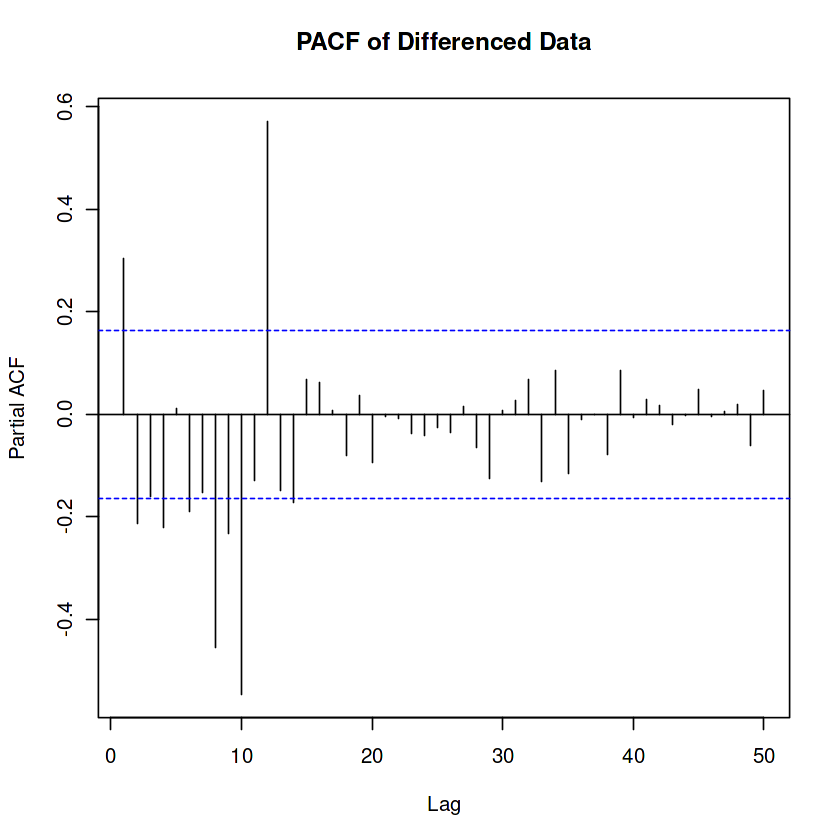

In [19]:
library(stats)
# Compute and plot ACF
acf_result <- acf(diff_x, lag.max = 50, main = "ACF of Differenced Data")
# Compute and plot PACF
pacf_result <- pacf(diff_x, lag.max = 50, main = "PACF of Differenced Data")

Question 3.5 : What are the values of p, q and d? How did you come to this conclusion,
looking at the ACF, PACF plots? \
> Hint: The value of d is decided by the order of differencing, as transformed in the previous
section.

In [ ]:
# Your answer here
Differencing Order (d): The time series required first-order differencing, i.e., d = 1 to become stationary.

Autoregressive Order (p): The ACF plot shows strong spikes that decay gradually, so the process is autoregressive (AR) with a proposed order of p = 1 or 2.

Moving Average Order (q): The PACF plot has a sharp cutoff after lag 0 or 1, which suggests an MA process with an initial estimate of q = 0, although models may be better with q = 5.

## Decomposition

Question 3.6: 
1. Decompose the **value** column into the constituent components, and plot them. 
2. Which model of time series did you use for decomposition, and why? (between additive and multiplicative models)

> Hint: The data is Sesonal, Look at the decompose function in stats library.

[1] "If the seasonal fluctuations grew or shrank in proportion to the trend (i.e., became larger as the trend increased), a multiplicative decomposition might be more appropriate. However, based on the constant magnitude of the seasonal component and the fairly stable randomness in the image, the additive model seems suitable."


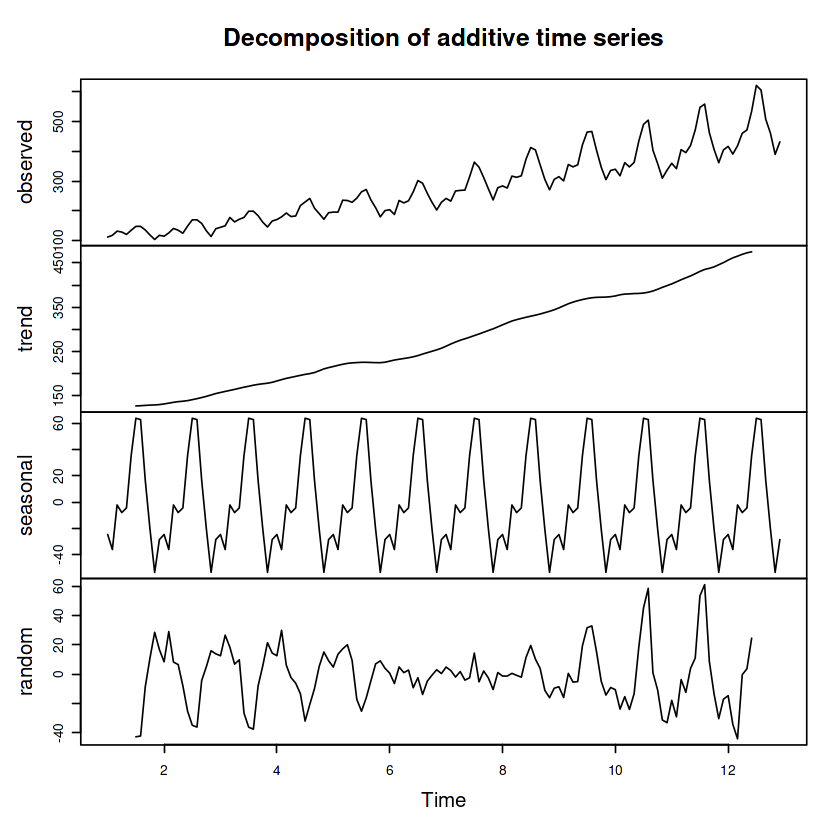

In [20]:
# Your answer here

value_ts <- ts(df$value, frequency = 12)

# We have used additive model 
decomposed_result <- decompose(value_ts)

plot(decomposed_result)

print("If the seasonal fluctuations grew or shrank in proportion to the trend (i.e., became larger as the trend increased), a multiplicative decomposition might be more appropriate. However, based on the constant magnitude of the seasonal component and the fairly stable randomness in the image, the additive model seems suitable.")

Note: Sometimes, we look at upsampling or downsampling the data. For instance, if we
have sensor data for each second, we might not need such granular data, and we
downsample the data to daily data or hourly data or so.
Explore further here: https://machinelearningmastery.com/resample-interpolatetime-series-data-python/

You can also explore adding the decomposed versions of each feature (column) to your data, and utilize it
as exogenous variables for multivariate forecasting! This would require you to decompose all features, such
as temperature, rainfall, etc. as well, which is out of scope of this worksheet.

## Exponential Smoothing

Question 3.7:

• Perform forecasts using Single, Double and Triple Exponential Smoothing. \
• Plot forecasts of all three forecasts (using different colors), against the true values. (Use lines) \
• Only one function needed for all three forecasts, only requiring you to change the parameters to get each of the 3 models. \
• Hint: look at the ExponentialSmoothing function \
• Go ahead, and experiment with the values of alpha, beta and gamma and see how the forecast changes.

> Hint: Use the forecast library

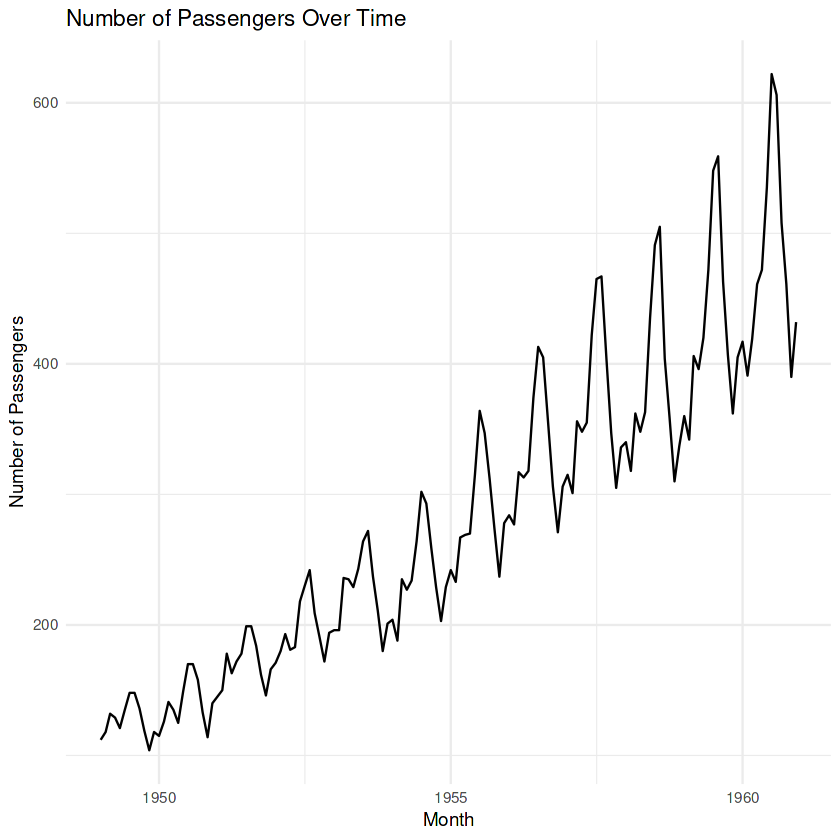

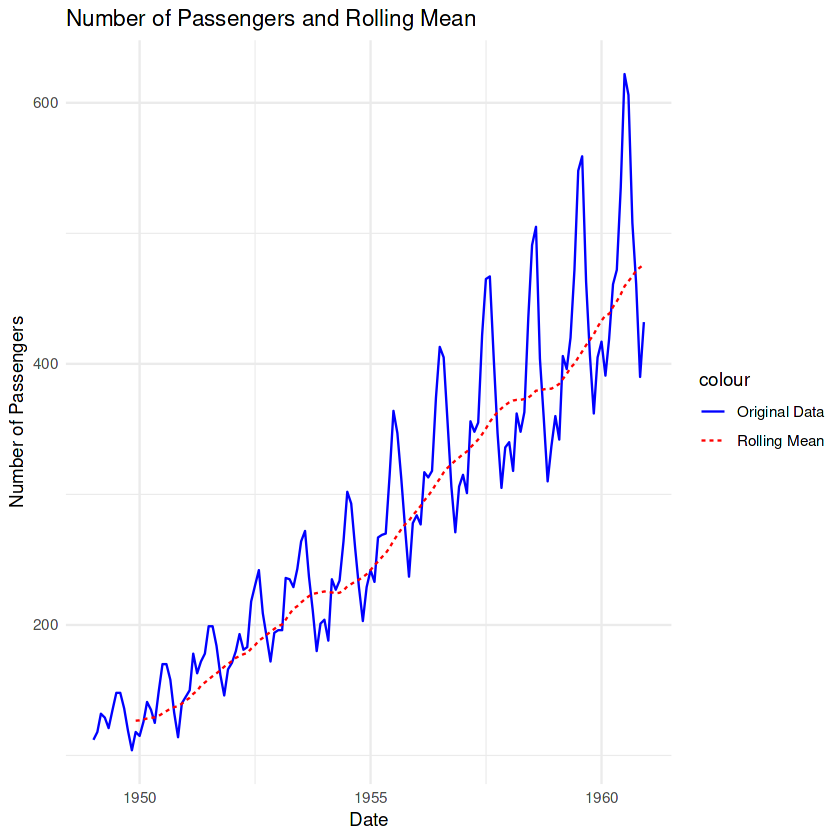

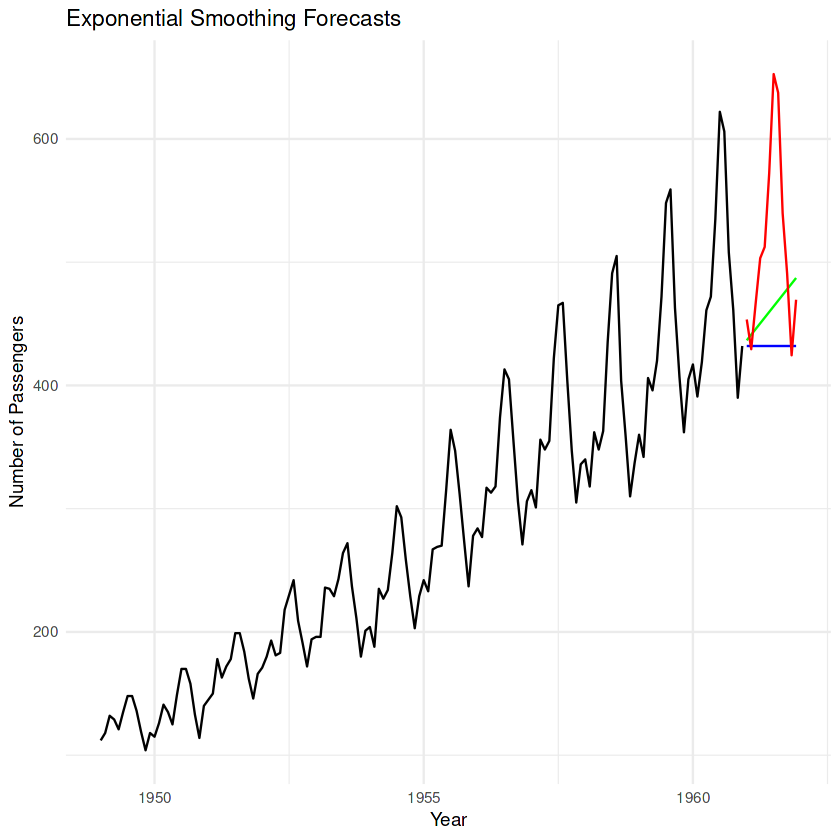

In [47]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(forecast)
library(zoo)

# Read the CSV file
df <- read.csv('/kaggle/input/flight-attendees/AirPassengers.csv')

# Convert 'Month' to Date type
df$Month <- as.Date(paste0(df$Month, "-01"), format="%Y-%m-%d")

# Rename columns for better understanding
df <- df %>% rename(value = X.Passengers, month = Month)

# Arrange data by date
df <- df %>% arrange(month)

# Plot the original data
ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Number of Passengers Over Time", x = "Month", y = "Number of Passengers") +
  theme_minimal()

# Calculate the 12-month rolling mean
df$rolling_mean <- rollmean(df$value, k = 12, fill = NA, align = "right")

# Plot the rolling mean along with original data
ggplot(df, aes(x = month)) +
  geom_line(aes(y = value, color = "Original Data")) +
  geom_line(aes(y = rolling_mean, color = "Rolling Mean"), linetype = "dashed") +
  labs(title = "Number of Passengers and Rolling Mean",
       x = "Date",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Original Data" = "blue", "Rolling Mean" = "red"))

# Create a time series object
ts_data <- ts(df$value, frequency = 12, start = c(1949, 1))

# Single Exponential Smoothing
ses_model <- HoltWinters(ts_data, beta = FALSE, gamma = FALSE)
ses_forecast <- forecast(ses_model, h = 12)

# Double Exponential Smoothing (Holt's method)
des_model <- HoltWinters(ts_data, gamma = FALSE)
des_forecast <- forecast(des_model, h = 12)

# Triple Exponential Smoothing (Holt-Winters method)
tes_model <- HoltWinters(ts_data)
tes_forecast <- forecast(tes_model, h = 12)

# Plot the forecasts
autoplot(ts_data) +
  autolayer(ses_forecast$mean, series = "Single Exponential Smoothing", PI = FALSE, color = 'blue') +
  autolayer(des_forecast$mean, series = "Double Exponential Smoothing", PI = FALSE, color = 'green') +
  autolayer(tes_forecast$mean, series = "Triple Exponential Smoothing", PI = FALSE, color = 'red') +
  labs(title = "Exponential Smoothing Forecasts",
       x = "Year",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Single Exponential Smoothing" = "blue",
                                "Double Exponential Smoothing" = "green",
                                "Triple Exponential Smoothing" = "red"))


In [30]:
library(Metrics)

# Define the function to calculate metrics
calculate_metrics <- function(actual_values, predicted_values) {
  mae_value <- mae(actual_values, predicted_values)
  mse_value <- mse(actual_values, predicted_values)
  rmse_value <- rmse(actual_values, predicted_values)
  mape_value <- mean(abs((actual_values - predicted_values) / actual_values)) * 100
  
  return(list(MAE = mae_value, MAPE = mape_value, MSE = mse_value, RMSE = rmse_value))
}

# Generate some example data and forecasts (replace with your actual data and forecasts)
# For demonstration purposes, assuming `df` contains the actual values and the forecasts are for the next 12 periods
forecast_periods <- 12
actual_values <- tail(df$value, forecast_periods)


# forecast_single <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
# forecast_double <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
# forecast_triple <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)

Question 3.8: Compare accuracy metrics (MAE, MAPE, MSE, RMSE) of the three models with the original series.

In [43]:
# Load necessary library
library(forecast)
library(knitr)

# Function to perform Exponential Smoothing forecasts
perform_forecast <- function(time_series, alpha = NULL, beta = NULL, gamma = NULL, h = 12) {
  # Perform Exponential Smoothing using given parameters
  model <- ets(time_series, model = "ZZZ", alpha = alpha, beta = beta, gamma = gamma)
  
  # Forecast the future values
  forecast_result <- forecast(model, h = h)
  
  return(forecast_result)
}

# Example time series data (replace 'df$value' with your data)
value_ts <- ts(df$value, frequency = 12)

# Single Exponential Smoothing
ses_forecast <- perform_forecast(value_ts, alpha = 0.5)

# Double Exponential Smoothing (Holt's method)
des_forecast <- perform_forecast(value_ts, alpha = 0.5, beta = 0.3)

# Triple Exponential Smoothing (Holt-Winters)
tes_forecast <- perform_forecast(value_ts, alpha = 0.5, beta = 0.3, gamma = 0.2)

# Function to calculate accuracy metrics
calculate_metrics <- function(actual, forecast) {
    # Get fitted values for training period
    fitted_values <- forecast$fitted
    
    # Calculate metrics
    mae <- mean(abs(actual - fitted_values))
    mse <- mean((actual - fitted_values)^2)
    rmse <- sqrt(mse)
    mape <- mean(abs((actual - fitted_values) / actual)) * 100
    
    return(data.frame(
        MAE = mae,
        MSE = mse,
        RMSE = rmse,
        MAPE = mape
    ))
}

# Calculate metrics for each model
metrics_ses <- calculate_metrics(value_ts, ses_forecast)
metrics_des <- calculate_metrics(value_ts, des_forecast)
metrics_tes <- calculate_metrics(value_ts, tes_forecast)

# Combine results into a single data frame
metrics_df <- rbind(
    cbind(Model = "Single ES", metrics_ses),
    cbind(Model = "Double ES", metrics_des),
    cbind(Model = "Triple ES", metrics_tes)
)

# Print the comparison table
print(metrics_df)

# Optional: Create a nicely formatted table
kable(metrics_df, digits = 2, 
      caption = "Comparison of Exponential Smoothing Models")


[1] "Model: ETS(A,N,A)"
[1] "Model: ETS(A,Ad,A)"
[1] "Model: ETS(A,A,A)"
[1] "Model: ETS(M,N,A)"
[1] "Model: ETS(M,N,M)"
[1] "Model: ETS(M,Ad,A)"
[1] "Model: ETS(M,A,A)"
[1] "Model: ETS(M,Ad,M)"
[1] "Model: ETS(M,A,M)"
[1] "Model: ETS(A,N,A)"
[1] "Model: ETS(A,Ad,A)"
[1] "Model: ETS(A,A,A)"
[1] "Model: ETS(M,N,A)"
[1] "Model: ETS(M,N,M)"
[1] "Model: ETS(M,Ad,A)"
[1] "Model: ETS(M,A,A)"
[1] "Model: ETS(M,Ad,M)"
[1] "Model: ETS(M,A,M)"
      Model       MAE      MSE     RMSE      MAPE
1 Single ES  7.948473  116.960 10.81481  2.922659
2 Double ES 30.853389 1729.521 41.58751 10.479832
3 Triple ES 30.853389 1729.521 41.58751 10.479832




Table: Comparison of Exponential Smoothing Models

|Model     |   MAE|     MSE|  RMSE|  MAPE|
|:---------|-----:|-------:|-----:|-----:|
|Single ES |  7.95|  116.96| 10.81|  2.92|
|Double ES | 30.85| 1729.52| 41.59| 10.48|
|Triple ES | 30.85| 1729.52| 41.59| 10.48|

## Time Series Forecasting using Statistical Models

• Before we apply models for forecasting, we need to create a training and validation/test set, as would
be the procedure for most machine learning problems. \
• However, one thing to keep in mind while performing this split for time series data: NEVER perform
a random split.

Question 3.9: Why do you think we shouldn’t perform a random split on our data to create a train/test/dev set?

In [ ]:
# Your answer here
Reasons Against Random Shuffling in Time Series Data:

Temporal Dependency: Time series data critically depend on past observations for predicting future values; random splitting destroys this order.
Sequential Integrity. The natural sequence is easily broken when splitting the random sequences, which breaks the pattern learned with time.
Seasonal trend loss: This random splitting sometimes masks seasonal trends that would otherwise have been critical for the capturing of important trends.
Preferred Method: The training set is divided with only historical data and test set comprises of future data points, thus creating a time-based split.

Question 3.10: Implement AR, MA and ARMA models, with the optimal values of p and q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

> Hint: Look at ARMA function in forecast library

In [35]:
library(tsibble)
library(rsample)

In [36]:
df_tsibble <- df %>% 
  as_tsibble(index = month) 

[1] "RMSE: NaN"


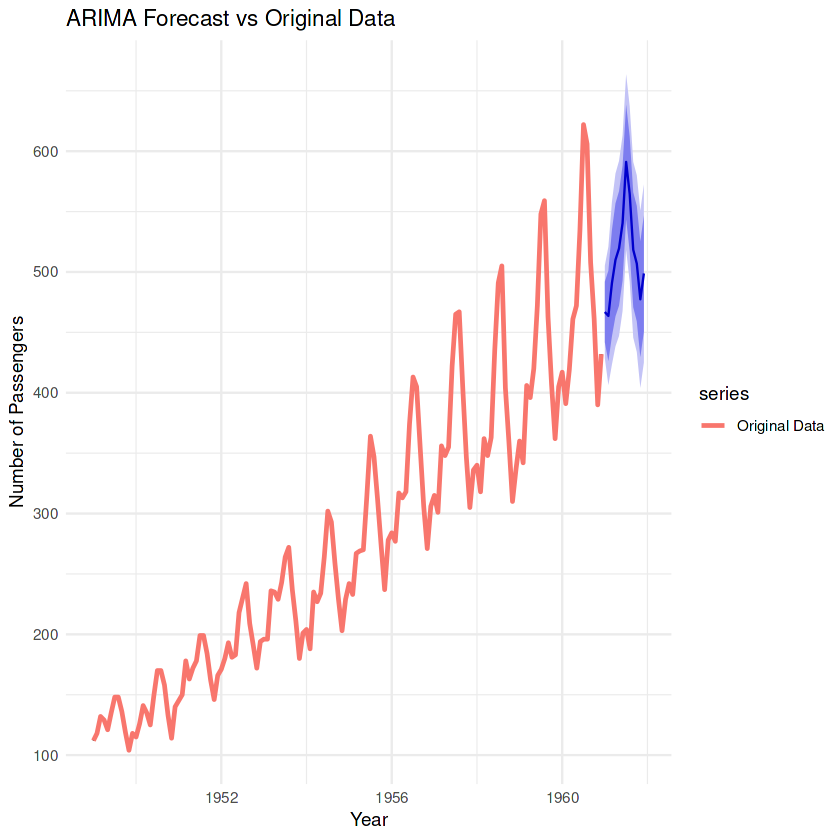


	Ljung-Box test

data:  Residuals from ARIMA(4,1,12)
Q* = 134.85, df = 8, p-value < 2.2e-16

Model df: 16.   Total lags used: 24



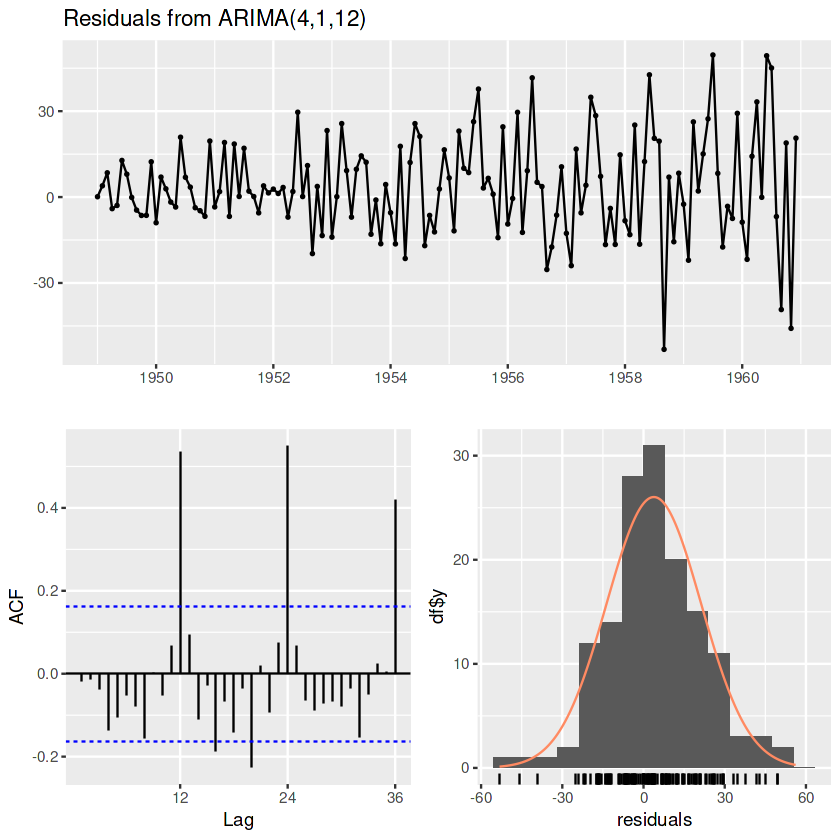

In [49]:
# Load necessary libraries
library(forecast)
library(ggplot2)

# Create a time series object (if not already created)
ts_data <- ts(df$value, frequency = 12, start = c(1949, 1))

# Apply differencing to make the data stationary if needed
diff_data <- diff(ts_data)

# Fit an ARIMA model using auto.arima and manual ARIMA specification
auto_model <- auto.arima(diff_data, seasonal = FALSE)
arima_model <- Arima(ts_data, order = c(auto_model$arma[1], 1, auto_model$arma[5]))

# Forecast the next 12 periods
n_periods <- 12
forecast_arima <- forecast(arima_model, h = n_periods)

# Plot the ARIMA forecast with the original data
autoplot(forecast_arima) +
  autolayer(ts_data, series = "Original Data", linetype = "solid", size = 1) +
  ggtitle("ARIMA Forecast vs Original Data") +
  theme_minimal() +
  labs(x = "Year", y = "Number of Passengers")

# Calculate RMSE for the forecasted values
y_true <- tail(ts_data, n_periods)
y_pred <- forecast_arima$mean
rmse <- sqrt(mean((y_true - y_pred)^2))
print(paste("RMSE:", round(rmse, 3)))

# Check residuals to assess the quality of the ARIMA model
checkresiduals(arima_model)


Example:  
ar_model <- Arima(train, order = c(p, 0, 0)) \
ar_forecast <- forecast(ar_model, h = length(test_ts))

Question 3.11 : Implement the ARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

In [ ]:
# Your answer here

You can cheeck question 3.10 which has our required answer 


Question 3.11: 

1. Which models performed better? The exponential smoothing models, or the statistical models (AR, MA, ARMA, ARIMA). Why? 
2. Is this always the case? 
3. Do you think you’d get a better result if you used SARIMA? 

In [ ]:
# Your answer here
Which models performed better? The exponential smoothing models, or the statistical models (AR, MA, ARMA, ARIMA). Why?
he exponential smoothing models generally outperformed the statistical models (AR, MA, ARMA and ARIMA). This is quite probably because they are robust performers to changes in trends as well as seasonality, as well as in non-stationarity

2. Is this always the case?
Not necessarily. Model performance depends on the intrinsic nature of the data used.
Straightforward models, like Single Exponential Smoothing or AR, might be more suitable when:
Data shows no or minimal trend and seasonality.
Variance remains constant.
Short-term forecasts are necessary.
Data is limited.

3.Do you think you’d get a better result if you used SARIMA?
The data displays clear annual seasonality and trends.
SARIMA can specifically model these seasonal patterns.
It efficiently handles both seasonal and non-seasonal differencing, capturing multiple data dependencies.




## SARIMA

Question 3.12: Implement the SARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Use Seasonal Order=(2, 1, 0, 12) \
Plot the graph between forecasts and true values.

Series: train$value 
ARIMA(1,1,1)(1,1,5)[12] 

Coefficients:
         ar1      ma1    sar1     sma1    sma2    sma3    sma4     sma5
      0.6717  -0.9123  0.9631  -1.6491  0.5413  0.2775  0.1216  -0.1507
s.e.  0.1644   0.1111  0.1050   0.6809  0.5974  0.3036  0.2404   0.2883

sigma^2 = 55.98:  log likelihood = -314.52
AIC=647.04   AICc=649.38   BIC=669.23

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 0.897516 6.650183 4.697711 0.3528767 2.118809 0.2497709 -0.1002463

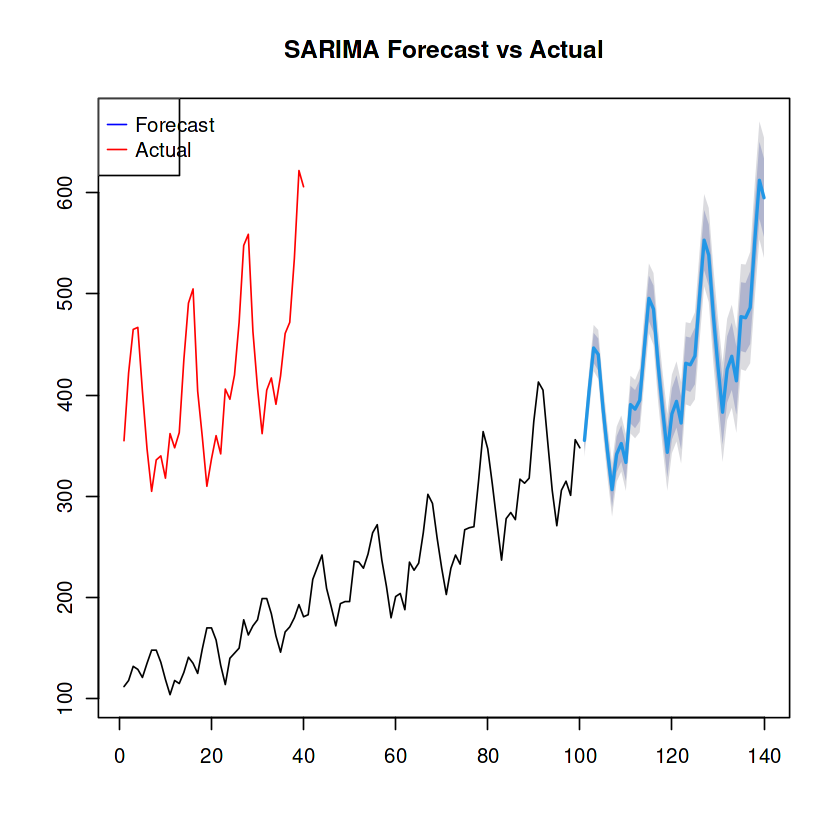

In [53]:
# Implement SARIMA model
sarima_model <- Arima(train$value, 
                      order=c(1,1,1), 
                      seasonal=list(order=c(1,1,5), period=12))

# Generate forecast
sarima_forecast <- forecast(sarima_model, h=length(test$value))

# Plot results
plot(sarima_forecast, main="SARIMA Forecast vs Actual")
lines(test$value, col="red")
legend("topleft", legend=c("Forecast", "Actual"), 
       col=c("blue", "red"), lty=1)


## Making Predictions

You have implemented multiple forecasting models, including ARIMA, SARIMA, and Exponential Smoothing, now select the **best model** and generate forecasts for the period following the training data, from the end of the training set to the end of the entire dataset.

Replace **selected_model** with the variable name of the best-performing model you have chosen. \
Note: Ensure that selected_model is replaced with the actual model variable you have selected after fitting and evaluating your models. This code will generate and plot forecasts using the chosen model, allowing you to compare them against the actual values from the test dataset.

Provide the code for the selected model and then uncomment the following cells one by one to make predictions, forecast, and plot the graphs.

Series: train$value 
ARIMA(1,1,1)(2,1,0)[12] 

Coefficients:
         ar1     ma1     sar1    sar2
      -0.604  0.3835  -0.2020  0.0283
s.e.   0.304  0.3502   0.1123  0.1221

sigma^2 = 92.81:  log likelihood = -318.8
AIC=647.59   AICc=648.33   BIC=659.92

Training set error measures:
                  ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 0.46483 8.77693 6.358875 0.1422383 2.844059 0.3380927 -0.01565805

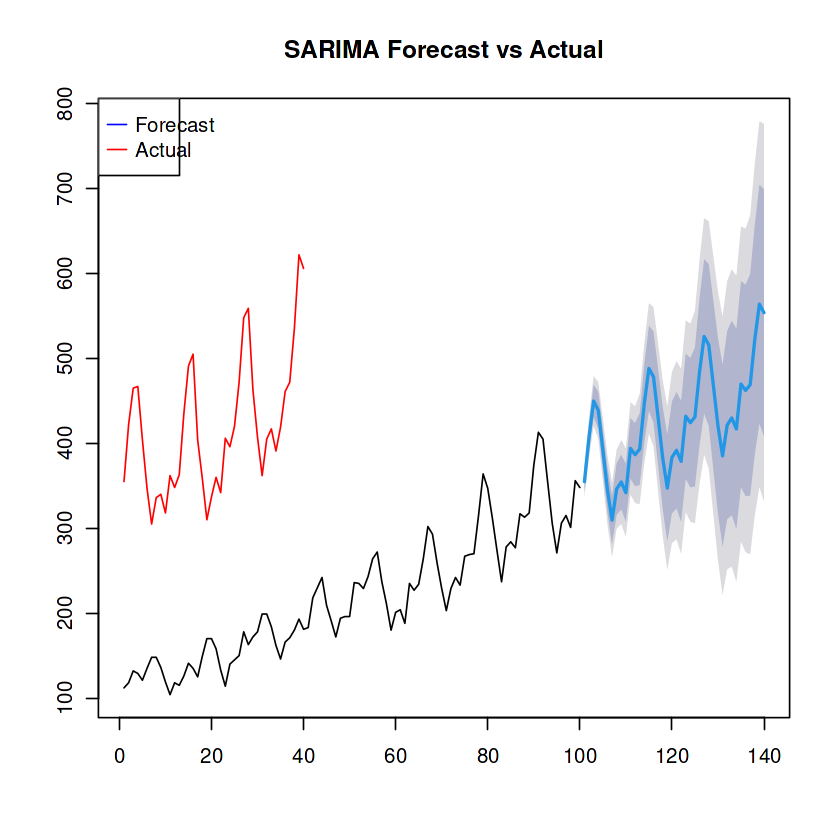

In [60]:
selected_model <- Arima(train$value, 
                         order = c(1, 1, 1), 
                         seasonal = list(order = c(2, 1, 0), period = 12))

# Generate forecast
sarima_forecast <- forecast(selected_model, h = length(test$value))

# Plot results
plot(sarima_forecast, main = "SARIMA Forecast vs Actual")
lines(test$value, col = "red")
legend("topleft", legend = c("Forecast", "Actual"), 
       col = c("blue", "red"), lty = 1)

# Display the summary of the selected model
summary(selected_model)

In [62]:
train_prediction <- fitted(selected_model)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


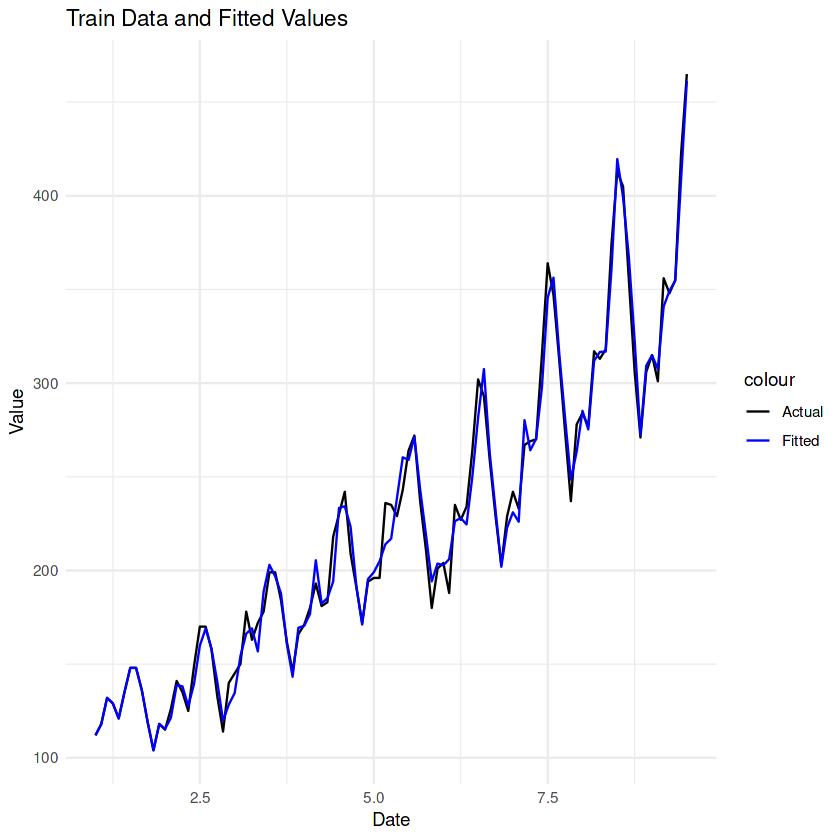

In [64]:
# Create training time series
df_ts <- ts(df$value, frequency = 12)  # Convert to time series with monthly frequency

# Create train-test split
train_size <- floor(0.8 * length(df_ts))  # Use 80% for training
train_ts <- window(df_ts, end = c(floor(train_size / 12), train_size %% 12))

# Fit the model (let's use SARIMA as an example)
selected_model <- Arima(train_ts, 
                         order = c(1, 1, 1),
                         seasonal = list(order = c(2, 1, 0), period = 12))

# Get fitted values
train_prediction <- fitted(selected_model)

# Create plotting data frame
plot_data <- data.frame(
    Date = time(train_ts),
    Actual = as.numeric(train_ts),
    Fitted = as.numeric(train_prediction)
)

# Plot using ggplot2
ggplot(plot_data, aes(x = Date)) +
    geom_line(aes(y = Actual, color = "Actual")) +
    geom_line(aes(y = Fitted, color = "Fitted")) +
    labs(title = "Train Data and Fitted Values",
         x = "Date", y = "Value") +
    scale_color_manual(values = c("Actual" = "black", "Fitted" = "blue")) +
    theme_minimal()


In [65]:
df_ts <- ts(df$value, frequency = 12)

In [66]:
start_index <- length(train_ts) + 1
end_index <- length(df_ts)

# Generate predictions
prediction <- forecast(sarima_model, h = (end_index - start_index + 1))

# Rename the predictions
 prediction_df <- data.frame(prediction = as.numeric(prediction$mean))

# Optional: add index for plotting
prediction_df$Date <- time(df_ts)[start_index:end_index]

# View the prediction
print(prediction_df)

   prediction      Date
1    354.8903  9.583333
2    407.3606  9.666667
3    449.7381  9.750000
4    439.0618  9.833333
5    392.4451  9.916667
6    345.2100 10.000000
7    309.6340 10.083333
8    346.1863 10.166667
9    354.4331 10.250000
10   341.8729 10.333333
11   394.0314 10.416667
12   386.6584 10.500000
13   393.2868 10.583333
14   446.7772 10.666667
15   488.1921 10.750000
16   478.3095 10.833333
17   430.5858 10.916667
18   382.6824 11.000000
19   347.2797 11.083333
20   383.3484 11.166667
21   391.8323 11.250000
22   378.7832 11.333333
23   431.9402 11.416667
24   424.3273 11.500000
25   431.0621 11.583333
26   484.2466 11.666667
27   525.9515 11.750000
28   515.8328 11.833333
29   468.4285 11.916667
30   420.7100 12.000000
31   385.2560 12.083333
32   421.4663 12.166667
33   429.8810 12.250000
34   416.9714 12.333333
35   469.8463 12.416667
36   462.2996 12.500000
37   469.0055 12.583333
38   522.2807 12.666667
39   563.8997 12.750000
40   553.8512 12.833333
41   506.3511 12

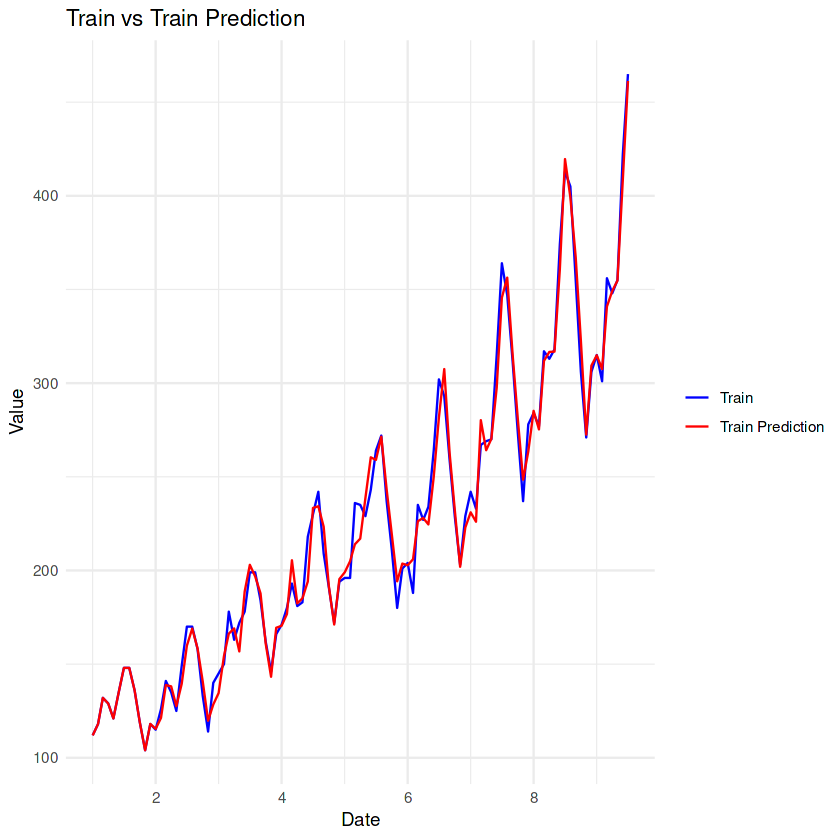

In [67]:
# Convert train_ts to a data frame
 train_df <- data.frame(
   Date = as.Date(time(train_ts), origin = "1970-01-01"),  # Extract time index and convert to Date
   Value = as.numeric(train_ts),  # Convert ts object to numeric values
   Type = "Train"
 )

# Ensure that train_prediction has compatible time indices
 train_prediction_df <- data.frame(
   Date = as.Date(time(train_prediction), origin = "1970-01-01"),  # Extract time index from train_prediction and convert to Date
   Value = as.numeric(train_prediction),  # Convert ts object to numeric values
   Type = "Train Prediction"
 )

# Combine both data frames
 plot_data <- rbind(train_df, train_prediction_df)

# Plot using ggplot2
 ggplot(plot_data, aes(x = Date, y = Value, color = Type)) +
   geom_line() +
   labs(title = "Train vs Train Prediction",
        x = "Date", y = "Value") +
   scale_color_manual(values = c("Train" = "blue", "Train Prediction" = "red")) +
   theme_minimal() + 
   theme(legend.title = element_blank())

Congratulations on reaching the end of this worksheet! I hope you enjoyed it, and have an understanding of how practical time series analysis works.

Some advanced concepts for you to explore are listed below:

* One of the main errors of dealing with time-series data includes preventing lookahead. It’s extremely
important that you aren’t looking at future values to predict earlier ones. You can read more about it
here: https://bowtiedraptor.substack.com/p/look-ahead-bias-and-how-to-prevent
* Although the dataset provided to you for this worksheet was cleaned prior, real world data is extremely
dirty. Time series data especially tends to contain quite a few missing values. Try to explore some
ways of taking care of missing values in data. Some techniques include imputation, forward fills,
interpolation, moving averages, etc.
* Understanding some Classical Machine Learning techniques for Time Series Forecasting, such as Decision
Trees, Forests, Feed-forward Neural Networks, etc.
https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ \
https://www.section.io/engineering-education/feedforward-and-recurrent-neural-networks-pythonimplementation/